<a href="https://colab.research.google.com/github/Sashank11/learn_tensorflow/blob/main/Forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is test notebook

In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-03-12 12:34:13--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.2’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.003s  

2023-03-12 12:34:13 (50.0 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.2’ saved [178509/178509]



# Importing with pandas

In [4]:
import pandas as pd
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",parse_dates = ["Date"], 
                 index_col = ["Date"]) # Telling pandas its a datatime type

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [6]:
len(df)

2787

# Visualizing

In [7]:
# looking at the closing price for each day

In [8]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns = {"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


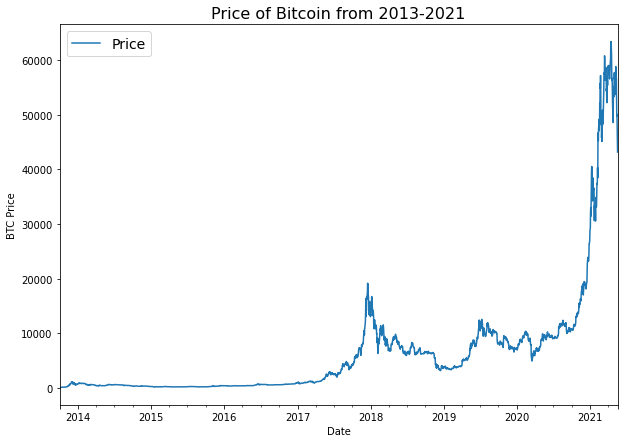

In [9]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 2013-2021", fontsize = 16)
plt.legend(fontsize =14);

# Train test set

In [10]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [11]:
# correct way to split - time series split
split_size = int(0.8 * len(prices))

X_train, y_train = timesteps[:split_size], prices[:split_size]

X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2229, 2229, 558, 558)

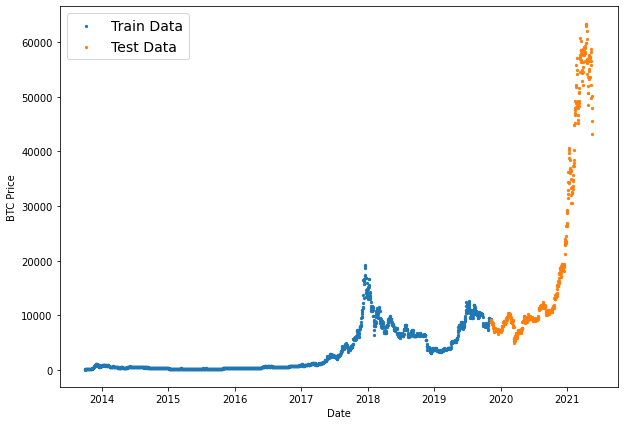

In [12]:
# plot the splits
plt.figure(figsize = (10,7))
plt.scatter(X_train, y_train, s = 5, label = "Train Data")
plt.scatter(X_test, y_test, s = 5, label = "Test Data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize = 14)
plt.show();

In [13]:
# Creating plotting function for future use

def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

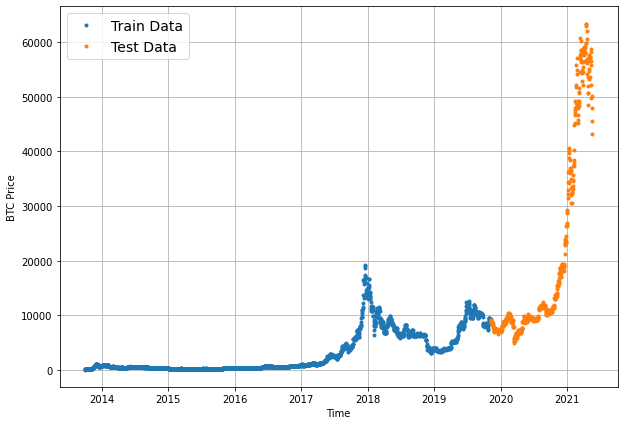

In [14]:
plt.figure(figsize = (10, 7))
plot_time_series(timesteps = X_train, values = y_train, label = "Train Data")
plot_time_series(timesteps = X_test, values = y_test, label = "Test Data")

# Creating Models

### Naive model

## Model 0

In [15]:
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

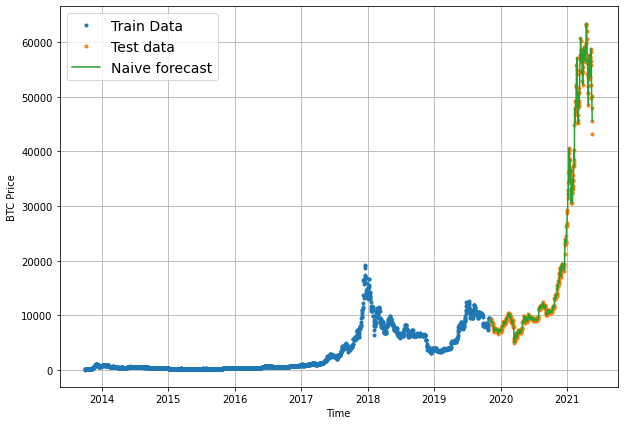

In [16]:
#plot
plt.figure(figsize = (10,7))
plot_time_series(timesteps = X_train, values = y_train, label = "Train Data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

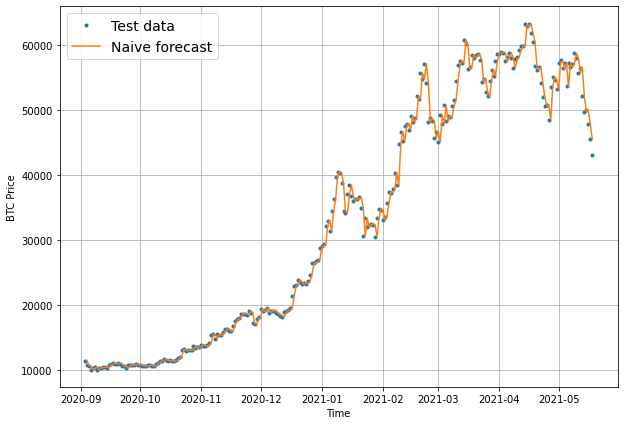

In [17]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps 
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

### Evaluating in time series Model

* MAE
* MSE
* RMSE
* MAPE/sMAPE
* MASE

In [18]:
import tensorflow as tf

In [19]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]- y_true[:-1]))
  return mae/mae_naive_no_season

In [20]:
mean_absolute_scaled_error(y_true = y_test[1:], y_pred = naive_forecast).numpy()

0.9995699939182624

In [21]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [22]:
naive_results = evaluate_preds(y_true = y_test[1:], y_pred = naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

### Windowing our dataset

In [23]:
#Global variables for window and horizon size
HORIZON = 1
WINDOW_SIZE = 7

In [24]:
#function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  return x[:, :-horizon], x[:, -horizon:]

In [25]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8) + 1, axis = 0))
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]], dtype=int32)>)

In [26]:
import numpy as np
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [27]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)


(2780, 2780)

In [28]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


### Turning windows into training and test sets

## Turning windows into training and test sets



In [29]:
def make_train_test_splits(windows, labels, test_split = 0.2):
  split_size = int(len(windows) * (1-test_split))
  train_windows = windows[:split_size]
  train_labels =  labels[:split_size]
  test_windows = windows[split_size:]
  test_labels =  labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [30]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows = full_windows, labels = full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [31]:
len(full_windows) * 0.8

2224.0

In [32]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]), array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [33]:
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Make a modelling checkpoint

In [34]:
import os

def create_model_checkpoint(model_name, save_path = "model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose = 0,
                                            save_best_only = True)

# Creating Models

### Model 1: window = 7, horizon = 1

In [35]:
import tensorflow as tf
from tensorflow.keras import layers
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON, activation ="linear")
], name = "model_1_dense")

# Compiling
model_1.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])
# fitting
model_1.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size =  128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_1.name)])

Epoch 1/100
14/18 [======================>.......] - ETA: 0s - loss: 785.2159 - mae: 785.2159 - mse: 2346159.5000   

18/18 [==============================] - 4s 117ms/step - loss: 722.9395 - mae: 722.9395 - mse: 2017558.5000 - val_loss: 1788.3499 - val_mae: 1788.3499 - val_mse: 8765871.0000
Epoch 2/100
16/18 [=========================>....] - ETA: 0s - loss: 239.6189 - mae: 239.6189 - mse: 263411.2500

18/18 [==============================] - 1s 46ms/step - loss: 234.0010 - mae: 234.0010 - mse: 251738.8750 - val_loss: 1201.5088 - val_mae: 1201.5088 - val_mse: 4617847.0000
Epoch 3/100
 9/18 [==============>...............] - ETA: 0s - loss: 192.8259 - mae: 192.8259 - mse: 181833.9219

18/18 [==============================] - 1s 55ms/step - loss: 187.0506 - mae: 187.0506 - mse: 175514.5469 - val_loss: 972.3395 - val_mae: 972.3395 - val_mse: 3062794.5000
Epoch 4/100
12/18 [===================>..........] - ETA: 0s - loss: 179.1797 - mae: 179.1797 - mse: 174468.8906

18/18 [==============================] - 1s 55ms/step - loss: 171.1029 - mae: 171.1029 - mse: 156785.2031 - val_loss: 950.7714 - val_mae: 950.7714 - val_mse: 2896333.2500
Epoch 5/100
10/18 [===============>..............] - ETA: 0s - loss: 173.2445 - mae: 173.2445 - mse: 159679.2344

18/18 [==============================] - 1s 68ms/step - loss: 167.0972 - mae: 167.0972 - mse: 150423.6250 - val_loss: 906.4163 - val_mae: 906.4163 - val_mse: 2761152.0000
Epoch 6/100
18/18 [==============================] - ETA: 0s - loss: 167.8561 - mae: 167.8561 - mse: 147253.3281

18/18 [==============================] - 2s 104ms/step - loss: 167.8561 - mae: 167.8561 - mse: 147253.3281 - val_loss: 896.4940 - val_mae: 896.4940 - val_mse: 2617029.0000
Epoch 7/100
14/18 [======================>.......] - ETA: 0s - loss: 165.8628 - mae: 165.8628 - mse: 149436.1562

18/18 [==============================] - 2s 111ms/step - loss: 159.7153 - mae: 159.7153 - mse: 136598.6719 - val_loss: 863.2475 - val_mae: 863.2475 - val_mse: 2508667.7500
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 128.0988 - mae: 128.0988 - mse: 71136.3438

18/18 [==============================] - 1s 65ms/step - loss: 155.4716 - mae: 155.4716 - mse: 131000.1328 - val_loss: 848.9984 - val_mae: 848.9984 - val_mse: 2427041.2500
Epoch 9/100
12/18 [===================>..........] - ETA: 0s - loss: 157.7668 - mae: 157.7668 - mse: 135681.6875

18/18 [==============================] - 1s 52ms/step - loss: 153.7182 - mae: 153.7182 - mse: 128615.6562 - val_loss: 824.5302 - val_mae: 824.5302 - val_mse: 2270165.7500
Epoch 10/100
15/18 [========================>.....] - ETA: 0s - loss: 146.0420 - mae: 146.0420 - mse: 116351.4297

18/18 [==============================] - 1s 41ms/step - loss: 149.5981 - mae: 149.5981 - mse: 123989.9844 - val_loss: 804.8969 - val_mae: 804.8969 - val_mse: 2168859.7500
Epoch 11/100
18/18 [==============================] - 0s 7ms/step - loss: 145.9151 - mae: 145.9151 - mse: 116224.5938 - val_loss: 847.0002 - val_mae: 847.0002 - val_mse: 2207130.5000
Epoch 12/100
18/18 [==============================] - 0s 7ms/step - loss: 145.5309 - mae: 145.5309 - mse: 114358.5078 - val_loss: 849.9148 - val_mae: 849.9148 - val_mse: 2182092.0000
Epoch 13/100
16/18 [=========================>....] - ETA: 0s - loss: 141.7111 - mae: 141.7111 - mse: 112343.2578

18/18 [==============================] - 1s 40ms/step - loss: 141.9335 - mae: 141.9335 - mse: 111504.9375 - val_loss: 776.0787 - val_mae: 776.0787 - val_mse: 1960184.6250
Epoch 14/100
15/18 [========================>.....] - ETA: 0s - loss: 134.5205 - mae: 134.5205 - mse: 104052.3516

18/18 [==============================] - 1s 34ms/step - loss: 136.5783 - mae: 136.5783 - mse: 105199.1719 - val_loss: 760.9498 - val_mae: 760.9498 - val_mse: 1890841.1250
Epoch 15/100
18/18 [==============================] - ETA: 0s - loss: 137.3696 - mae: 137.3696 - mse: 103613.2266

18/18 [==============================] - 1s 29ms/step - loss: 137.3696 - mae: 137.3696 - mse: 103613.2266 - val_loss: 735.7166 - val_mae: 735.7166 - val_mse: 1806153.5000
Epoch 16/100
18/18 [==============================] - 0s 5ms/step - loss: 132.3004 - mae: 132.3004 - mse: 97600.8359 - val_loss: 739.0428 - val_mae: 739.0428 - val_mse: 1782181.8750
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 131.1165 - mae: 131.1165 - mse: 97774.4844 - val_loss: 757.5254 - val_mae: 757.5254 - val_mse: 1811512.3750
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 147.3542 - mae: 147.3542 - mse: 110406.0859

18/18 [==============================] - 1s 30ms/step - loss: 130.7903 - mae: 130.7903 - mse: 95651.5156 - val_loss: 704.2164 - val_mae: 704.2164 - val_mse: 1662681.3750
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 128.0654 - mae: 128.0654 - mse: 93028.6016 - val_loss: 719.0927 - val_mae: 719.0927 - val_mse: 1676373.8750
Epoch 20/100
18/18 [==============================] - 0s 5ms/step - loss: 126.1648 - mae: 126.1648 - mse: 90228.4453 - val_loss: 741.1692 - val_mae: 741.1692 - val_mse: 1848695.3750
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 177.7392 - mae: 177.7392 - mse: 135299.9062

18/18 [==============================] - 0s 29ms/step - loss: 131.1330 - mae: 131.1330 - mse: 96440.4297 - val_loss: 685.8741 - val_mae: 685.8741 - val_mse: 1566924.2500
Epoch 22/100
14/18 [======================>.......] - ETA: 0s - loss: 128.2114 - mae: 128.2114 - mse: 96543.3906 

18/18 [==============================] - 1s 31ms/step - loss: 123.1151 - mae: 123.1151 - mse: 86608.8906 - val_loss: 672.8072 - val_mae: 672.8072 - val_mse: 1524325.8750
Epoch 23/100
18/18 [==============================] - ETA: 0s - loss: 124.5238 - mae: 124.5238 - mse: 86731.7422

18/18 [==============================] - 1s 29ms/step - loss: 124.5238 - mae: 124.5238 - mse: 86731.7422 - val_loss: 659.0934 - val_mae: 659.0934 - val_mse: 1482440.7500
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 131.2898 - mae: 131.2898 - mse: 82510.8438

18/18 [==============================] - 1s 29ms/step - loss: 123.9446 - mae: 123.9446 - mse: 87014.7656 - val_loss: 648.0121 - val_mae: 648.0121 - val_mse: 1452843.8750
Epoch 25/100
18/18 [==============================] - ETA: 0s - loss: 119.2019 - mae: 119.2019 - mse: 82601.3281

18/18 [==============================] - 1s 29ms/step - loss: 119.2019 - mae: 119.2019 - mse: 82601.3281 - val_loss: 640.2433 - val_mae: 640.2433 - val_mse: 1423511.2500
Epoch 26/100
18/18 [==============================] - ETA: 0s - loss: 119.5477 - mae: 119.5477 - mse: 82026.4375

18/18 [==============================] - 1s 31ms/step - loss: 119.5477 - mae: 119.5477 - mse: 82026.4375 - val_loss: 634.3946 - val_mae: 634.3946 - val_mse: 1400137.3750
Epoch 27/100
17/18 [===========================>..] - ETA: 0s - loss: 120.7968 - mae: 120.7968 - mse: 79773.4062 

18/18 [==============================] - 1s 44ms/step - loss: 121.0901 - mae: 121.0901 - mse: 81447.2344 - val_loss: 629.6850 - val_mae: 629.6850 - val_mse: 1394403.8750
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 111.6957 - mae: 111.6957 - mse: 73183.6250

18/18 [==============================] - 1s 30ms/step - loss: 116.5591 - mae: 116.5591 - mse: 79503.6797 - val_loss: 624.4832 - val_mae: 624.4832 - val_mse: 1375017.5000
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 115.4258 - mae: 115.4258 - mse: 94849.8125

18/18 [==============================] - 1s 30ms/step - loss: 117.0281 - mae: 117.0281 - mse: 79242.6953 - val_loss: 616.4133 - val_mae: 616.4133 - val_mse: 1341199.5000
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 133.0917 - mae: 133.0917 - mse: 99217.3438

18/18 [==============================] - 1s 29ms/step - loss: 122.3436 - mae: 122.3436 - mse: 82632.5156 - val_loss: 613.9470 - val_mae: 613.9470 - val_mse: 1336185.3750
Epoch 31/100
18/18 [==============================] - ETA: 0s - loss: 113.1672 - mae: 113.1672 - mse: 75056.1328

18/18 [==============================] - 1s 30ms/step - loss: 113.1672 - mae: 113.1672 - mse: 75056.1328 - val_loss: 612.2979 - val_mae: 612.2979 - val_mse: 1317421.8750
Epoch 32/100
18/18 [==============================] - ETA: 0s - loss: 114.0841 - mae: 114.0841 - mse: 77298.7188

18/18 [==============================] - 1s 29ms/step - loss: 114.0841 - mae: 114.0841 - mse: 77298.7188 - val_loss: 605.4290 - val_mae: 605.4290 - val_mse: 1305376.3750
Epoch 33/100
18/18 [==============================] - 0s 6ms/step - loss: 115.5507 - mae: 115.5507 - mse: 78055.7812 - val_loss: 657.2770 - val_mae: 657.2770 - val_mse: 1404970.8750
Epoch 34/100
18/18 [==============================] - 0s 5ms/step - loss: 114.4828 - mae: 114.4828 - mse: 76871.8438 - val_loss: 609.6163 - val_mae: 609.6163 - val_mse: 1315406.8750
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 113.6491 - mae: 113.6491 - mse: 76814.2266 - val_loss: 630.6559 - val_mae: 630.6559 - val_mse: 1364925.1250
Epoch 36/100
15/18 [========================>.....] - ETA: 0s - loss: 112.4941 - mae: 112.4941 - mse: 74838.9141 

18/18 [==============================] - 1s 30ms/step - loss: 113.9240 - mae: 113.9240 - mse: 74241.7891 - val_loss: 595.0815 - val_mae: 595.0815 - val_mse: 1271841.1250
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 127.1245 - mae: 127.1245 - mse: 103521.4844

18/18 [==============================] - 0s 28ms/step - loss: 110.9327 - mae: 110.9327 - mse: 73826.9141 - val_loss: 590.2042 - val_mae: 590.2042 - val_mse: 1253290.1250
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 113.3513 - mae: 113.3513 - mse: 74507.8594 - val_loss: 635.9001 - val_mae: 635.9001 - val_mse: 1364653.6250
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 113.1526 - mae: 113.1526 - mse: 73258.6016 - val_loss: 592.2261 - val_mae: 592.2261 - val_mse: 1246515.3750
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 106.2200 - mae: 106.2200 - mse: 94287.5078

18/18 [==============================] - 1s 34ms/step - loss: 109.8590 - mae: 109.8590 - mse: 71852.2031 - val_loss: 584.6891 - val_mae: 584.6891 - val_mse: 1238265.3750
Epoch 41/100
18/18 [==============================] - 0s 7ms/step - loss: 110.0274 - mae: 110.0274 - mse: 72138.1797 - val_loss: 631.7769 - val_mae: 631.7769 - val_mse: 1341375.8750
Epoch 42/100
18/18 [==============================] - 0s 9ms/step - loss: 114.8511 - mae: 114.8511 - mse: 75645.2266 - val_loss: 642.8746 - val_mae: 642.8746 - val_mse: 1347308.8750
Epoch 43/100
18/18 [==============================] - 0s 7ms/step - loss: 115.6430 - mae: 115.6430 - mse: 72344.0469 - val_loss: 630.4019 - val_mae: 630.4019 - val_mse: 1332445.8750
Epoch 44/100
18/18 [==============================] - 0s 6ms/step - loss: 114.7121 - mae: 114.7121 - mse: 72995.9453 - val_loss: 599.2340 - val_mae: 599.2340 - val_mse: 1250046.8750
Epoch 45/100
18/18 [==============================] - 0s 7ms/step - loss: 109.0320 - mae: 109.0320 - m

18/18 [==============================] - 1s 41ms/step - loss: 118.3325 - mae: 118.3325 - mse: 76182.4688 - val_loss: 576.6597 - val_mae: 576.6597 - val_mse: 1201850.0000
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 108.6366 - mae: 108.6366 - mse: 70064.5625 - val_loss: 577.8292 - val_mae: 577.8292 - val_mse: 1201751.5000
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 112.5702 - mae: 112.5702 - mse: 73481.6797 - val_loss: 589.2440 - val_mae: 589.2440 - val_mse: 1222517.1250
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 109.8345 - mae: 109.8345 - mse: 71311.2266 - val_loss: 597.2653 - val_mae: 597.2653 - val_mse: 1236208.7500
Epoch 54/100
 1/18 [>.............................] - ETA: 0s - loss: 101.1565 - mae: 101.1565 - mse: 62153.4922

18/18 [==============================] - 0s 29ms/step - loss: 107.7445 - mae: 107.7445 - mse: 69284.8047 - val_loss: 576.6335 - val_mae: 576.6335 - val_mse: 1199030.7500
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 125.4266 - mae: 125.4266 - mse: 96178.4922

18/18 [==============================] - 0s 28ms/step - loss: 114.1455 - mae: 114.1455 - mse: 74872.9062 - val_loss: 570.9386 - val_mae: 570.9386 - val_mse: 1187864.8750
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 112.4833 - mae: 112.4833 - mse: 72114.8281 - val_loss: 828.3880 - val_mae: 828.3880 - val_mse: 1940682.6250
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 135.3260 - mae: 135.3260 - mse: 89841.4062 - val_loss: 733.1284 - val_mae: 733.1284 - val_mse: 1613901.3750
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 115.1450 - mae: 115.1450 - mse: 72726.3047 - val_loss: 584.5749 - val_mae: 584.5749 - val_mse: 1209719.2500
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 110.6249 - mae: 110.6249 - mse: 70695.3125 - val_loss: 625.9889 - val_mae: 625.9889 - val_mse: 1304142.3750
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 111.7830 - mae: 111.7830 - m

18/18 [==============================] - 0s 28ms/step - loss: 109.3198 - mae: 109.3198 - mse: 71893.5156 - val_loss: 567.5192 - val_mae: 567.5192 - val_mse: 1179464.6250
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 106.5691 - mae: 106.5691 - mse: 68715.7734 - val_loss: 579.0518 - val_mae: 579.0518 - val_mse: 1196547.7500
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 110.0175 - mae: 110.0175 - mse: 71022.7109 - val_loss: 620.7774 - val_mae: 620.7774 - val_mse: 1280115.3750
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 108.4940 - mae: 108.4940 - mse: 69705.3984 - val_loss: 575.7818 - val_mae: 575.7818 - val_mse: 1189618.5000
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 107.8568 - mae: 107.8568 - mse: 69582.5156 - val_loss: 568.0596 - val_mae: 568.0596 - val_mse: 1176019.7500
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 106.7165 - mae: 106.7165 - m

18/18 [==============================] - 0s 28ms/step - loss: 108.1417 - mae: 108.1417 - mse: 69195.6172 - val_loss: 566.2025 - val_mae: 566.2025 - val_mse: 1169957.1250
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 107.8813 - mae: 107.8813 - mse: 69686.5156 - val_loss: 572.0419 - val_mae: 572.0419 - val_mse: 1177503.7500
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 106.6109 - mae: 106.6109 - mse: 68775.8672 - val_loss: 574.1190 - val_mae: 574.1190 - val_mse: 1179010.0000
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 109.2313 - mae: 109.2313 - mse: 69994.1250 - val_loss: 569.3940 - val_mae: 569.3940 - val_mse: 1171653.0000
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 107.5516 - mae: 107.5516 - mse: 69067.9375 - val_loss: 586.0229 - val_mae: 586.0229 - val_mse: 1207207.3750
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 108.5868 - mae: 108.5868 - m

18/18 [==============================] - 1s 44ms/step - loss: 115.3870 - mae: 115.3870 - mse: 74923.4688 - val_loss: 564.2176 - val_mae: 564.2176 - val_mse: 1161807.2500
Epoch 83/100
18/18 [==============================] - 0s 6ms/step - loss: 113.0124 - mae: 113.0124 - mse: 72305.3203 - val_loss: 641.3568 - val_mae: 641.3568 - val_mse: 1327931.6250
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 113.1747 - mae: 113.1747 - mse: 71374.4844 - val_loss: 603.4635 - val_mae: 603.4635 - val_mse: 1242166.5000
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 107.3971 - mae: 107.3971 - mse: 68602.7812 - val_loss: 581.9209 - val_mae: 581.9209 - val_mse: 1189390.2500
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 107.4477 - mae: 107.4477 - mse: 67697.2500 - val_loss: 579.2120 - val_mae: 579.2120 - val_mse: 1183522.6250
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 105.3951 - mae: 105.3951 - m

In [36]:
# Eval
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 714.1326 - mae: 714.1326 - mse: 1497927.7500


[714.132568359375, 714.132568359375, 1497927.75]

In [37]:
# loading model
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 564.2175 - mae: 564.2175 - mse: 1161807.1250


[564.217529296875, 564.217529296875, 1161807.125]

In [38]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [39]:
# Make preds
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8831.383, 8764.553, 9020.612, 8789.213, 8729.873, 8711.177,
        8661.567, 8539.623, 8425.637, 8521.519], dtype=float32)>)

In [40]:
# Eval preds
model_1_res = evaluate_preds(y_true = tf.squeeze(test_labels),
                                                 y_pred = model_1_preds)
model_1_res

{'mae': 564.2175,
 'mse': 1161807.2,
 'rmse': 1077.8717,
 'mape': 2.5279284,
 'mase': 0.9911739}

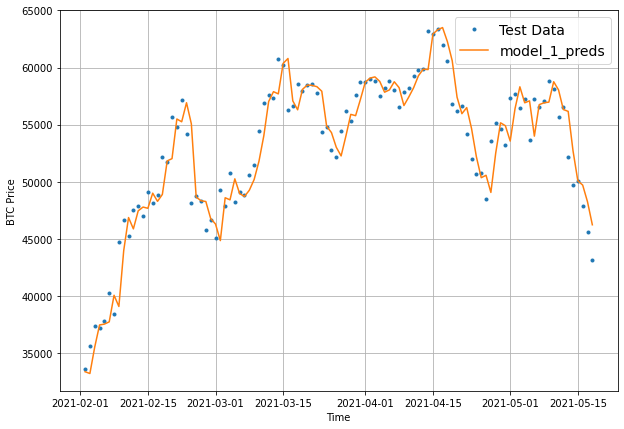

In [41]:
# Plot model 1
offset = 450
plt.figure(figsize=(10,7))
plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = test_labels[:, 0],
                 start = offset,
                 label = "Test Data")

plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = model_1_preds,
                 start = offset,
                 format = "-",
                 label = "model_1_preds")

In [42]:
HORIZON = 7
WINDOW_SIZE = 30

In [43]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [44]:
# Train and test
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows = full_windows,
                                                                  labels = full_labels,
                                                                  test_split = 0.2)

### Model 2

In [45]:
import tensorflow as tf
from tensorflow.keras import layers
tf.random.set_seed(42)

# Construct model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON, activation ="linear")
], name = "model_2_dense")

# Compiling
model_2.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])
# fitting
model_2.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 0,
            batch_size =  128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_2.name)])

In [46]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1379.7836 - mae: 1379.7836 - mse: 6011283.5000


[1379.7835693359375, 1379.7835693359375, 6011283.5]

In [47]:
# Loading the best perfoming instance into the model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1236.1534 - mae: 1236.1534 - mse: 5328507.5000


[1236.1534423828125, 1236.1534423828125, 5328507.5]

In [48]:
model_2_preds = make_preds(model_2,
                           input_data = test_windows)

18/18 [==============================] - 0s 1ms/step


In [49]:
# making eval fun work for larger horizons
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  # for diff horizon
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [50]:
model_2_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_2_preds)
model_2_results

{'mae': 1236.1534,
 'mse': 5328507.0,
 'rmse': 1418.4436,
 'mape': 5.532939,
 'mase': 2.199666}

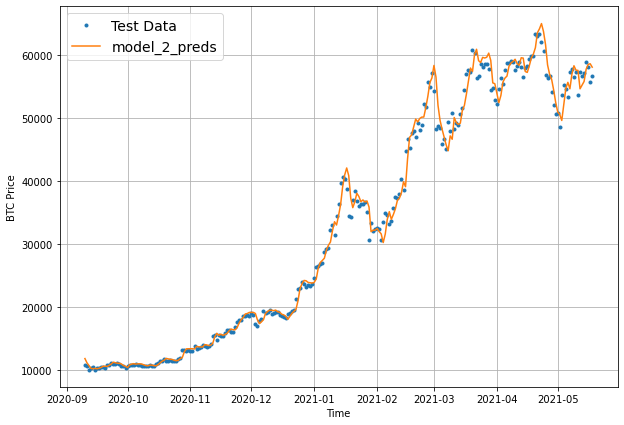

In [51]:
#Plot model 2
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = test_labels[:, 0],
                 start = offset,
                 format = ".",
                 label = "Test Data")

plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = tf.reduce_mean(model_2_preds, axis = 1),
                 start = offset,
                 format = "-",
                 label = "model_2_preds")

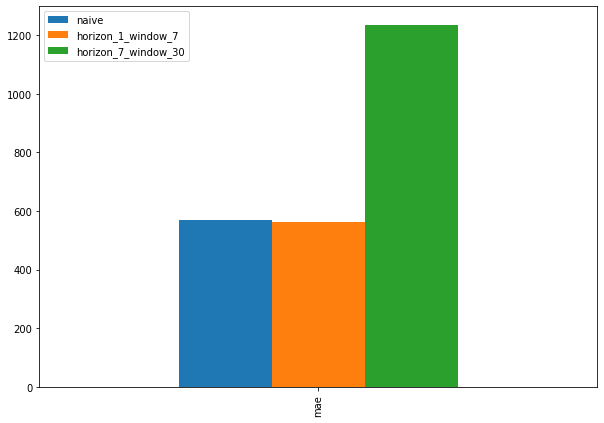

In [52]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_res["mae"],
              "horizon_7_window_30": model_2_results["mae"]}, index = ["mae"]).plot(figsize = (10,7), kind = "bar");

### Conv 1D model

In [53]:
HORIZON = 1
WINDOW_SIZE = 7

In [54]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

## Train-Test sets

In [55]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows = full_windows, labels = full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

# Reshaping data to fit in Conv1D layer

In [56]:
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [57]:
expand_dims_layers = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))

In [58]:
x.shape


TensorShape([7])

In [59]:
expand_dims_layers(x).shape
expand_dims_layers(x)

<tf.Tensor: shape=(7, 1), dtype=float32, numpy=
array([[123.65499],
       [125.455  ],
       [108.58483],
       [118.67466],
       [121.33866],
       [120.65533],
       [121.795  ]], dtype=float32)>

## Create Conv1D layer

In [60]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
    layers.Conv1D(filters = 128, kernel_size = 5, strides = 1, padding = "causal", activation = "relu" ),
    layers.Dense(HORIZON)
],  name = "model_4_1D")


model_4.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam())

model_4.fit(train_windows, train_labels,
            batch_size = 128,
            epochs = 100,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_4.name)])

Epoch 1/100
15/18 [========================>.....] - ETA: 0s - loss: 1572.8521 

18/18 [==============================] - 3s 53ms/step - loss: 1396.0452 - val_loss: 1323.8539
Epoch 2/100
18/18 [==============================] - 0s 8ms/step - loss: 324.2292 - val_loss: 1712.3501
Epoch 3/100
13/18 [====================>.........] - ETA: 0s - loss: 221.7499

18/18 [==============================] - 1s 55ms/step - loss: 217.2618 - val_loss: 1135.9353
Epoch 4/100
11/18 [=================>............] - ETA: 0s - loss: 203.3429

18/18 [==============================] - 1s 57ms/step - loss: 190.0801 - val_loss: 1014.5773
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 182.9309 - val_loss: 1030.3219
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 180.1534 - val_loss: 1022.6909
Epoch 7/100
16/18 [=========================>....] - ETA: 0s - loss: 184.3644

18/18 [==============================] - 1s 39ms/step - loss: 179.9342 - val_loss: 975.4612
Epoch 8/100
18/18 [==============================] - 0s 8ms/step - loss: 174.0450 - val_loss: 980.2030
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 171.1215 - val_loss: 992.6566
Epoch 10/100
17/18 [===========================>..] - ETA: 0s - loss: 166.9008

18/18 [==============================] - 1s 39ms/step - loss: 168.3382 - val_loss: 936.5872
Epoch 11/100
17/18 [===========================>..] - ETA: 0s - loss: 165.2429

18/18 [==============================] - 1s 37ms/step - loss: 164.9740 - val_loss: 917.1176
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 162.1502 - val_loss: 985.4736
Epoch 13/100
18/18 [==============================] - ETA: 0s - loss: 161.0810

18/18 [==============================] - 1s 54ms/step - loss: 161.0810 - val_loss: 890.2059
Epoch 14/100
18/18 [==============================] - 0s 6ms/step - loss: 156.2469 - val_loss: 890.5217
Epoch 15/100
14/18 [======================>.......] - ETA: 0s - loss: 158.6451

18/18 [==============================] - 1s 39ms/step - loss: 156.7163 - val_loss: 884.6732
Epoch 16/100
14/18 [======================>.......] - ETA: 0s - loss: 150.5890

18/18 [==============================] - 1s 39ms/step - loss: 150.2646 - val_loss: 869.8442
Epoch 17/100
17/18 [===========================>..] - ETA: 0s - loss: 148.1091

18/18 [==============================] - 1s 38ms/step - loss: 148.3633 - val_loss: 868.7375
Epoch 18/100
15/18 [========================>.....] - ETA: 0s - loss: 153.2567

18/18 [==============================] - 1s 38ms/step - loss: 146.7420 - val_loss: 836.1967
Epoch 19/100
14/18 [======================>.......] - ETA: 0s - loss: 147.4214

18/18 [==============================] - 1s 39ms/step - loss: 143.5147 - val_loss: 800.7670
Epoch 20/100
18/18 [==============================] - 0s 5ms/step - loss: 143.2571 - val_loss: 804.0783
Epoch 21/100
17/18 [===========================>..] - ETA: 0s - loss: 139.9498

18/18 [==============================] - 1s 37ms/step - loss: 141.0797 - val_loss: 765.9391
Epoch 22/100
18/18 [==============================] - ETA: 0s - loss: 139.5949

18/18 [==============================] - 1s 38ms/step - loss: 139.5949 - val_loss: 758.9454
Epoch 23/100
17/18 [===========================>..] - ETA: 0s - loss: 133.4742

18/18 [==============================] - 1s 39ms/step - loss: 134.5883 - val_loss: 748.4240
Epoch 24/100
18/18 [==============================] - ETA: 0s - loss: 134.2928

18/18 [==============================] - 1s 38ms/step - loss: 134.2928 - val_loss: 742.9275
Epoch 25/100
17/18 [===========================>..] - ETA: 0s - loss: 132.3356

18/18 [==============================] - 1s 49ms/step - loss: 131.7502 - val_loss: 723.1124
Epoch 26/100
18/18 [==============================] - 0s 7ms/step - loss: 132.9987 - val_loss: 732.8251
Epoch 27/100
12/18 [===================>..........] - ETA: 0s - loss: 135.7906

18/18 [==============================] - 1s 78ms/step - loss: 130.4526 - val_loss: 703.1611
Epoch 28/100
18/18 [==============================] - 0s 6ms/step - loss: 126.6482 - val_loss: 704.5807
Epoch 29/100
17/18 [===========================>..] - ETA: 0s - loss: 123.5483

18/18 [==============================] - 1s 39ms/step - loss: 125.7168 - val_loss: 698.2095
Epoch 30/100
18/18 [==============================] - 0s 6ms/step - loss: 129.6680 - val_loss: 799.1720
Epoch 31/100
18/18 [==============================] - 0s 6ms/step - loss: 137.5801 - val_loss: 813.3571
Epoch 32/100
17/18 [===========================>..] - ETA: 0s - loss: 132.7099

18/18 [==============================] - 1s 37ms/step - loss: 132.1501 - val_loss: 689.2328
Epoch 33/100
18/18 [==============================] - ETA: 0s - loss: 125.2259

18/18 [==============================] - 1s 38ms/step - loss: 125.2259 - val_loss: 686.9803
Epoch 34/100
17/18 [===========================>..] - ETA: 0s - loss: 121.2419

18/18 [==============================] - 1s 37ms/step - loss: 121.8596 - val_loss: 664.1882
Epoch 35/100
15/18 [========================>.....] - ETA: 0s - loss: 123.2296

18/18 [==============================] - 1s 37ms/step - loss: 120.4626 - val_loss: 659.5623
Epoch 36/100
18/18 [==============================] - 0s 6ms/step - loss: 123.6898 - val_loss: 720.7512
Epoch 37/100
17/18 [===========================>..] - ETA: 0s - loss: 121.1409

18/18 [==============================] - 1s 40ms/step - loss: 121.9951 - val_loss: 643.1843
Epoch 38/100
16/18 [=========================>....] - ETA: 0s - loss: 118.7351

18/18 [==============================] - 1s 38ms/step - loss: 118.9839 - val_loss: 637.6893
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 119.2643 - val_loss: 659.9678
Epoch 40/100
17/18 [===========================>..] - ETA: 0s - loss: 117.8724

18/18 [==============================] - 1s 38ms/step - loss: 117.4837 - val_loss: 637.2958
Epoch 41/100
18/18 [==============================] - 0s 6ms/step - loss: 118.2406 - val_loss: 643.4413
Epoch 42/100
16/18 [=========================>....] - ETA: 0s - loss: 122.3252

18/18 [==============================] - 1s 38ms/step - loss: 122.7041 - val_loss: 623.2410
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 116.0725 - val_loss: 635.4371
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 118.2626 - val_loss: 641.2299
Epoch 45/100
18/18 [==============================] - 0s 6ms/step - loss: 119.2065 - val_loss: 629.2326
Epoch 46/100
17/18 [===========================>..] - ETA: 0s - loss: 115.8795

18/18 [==============================] - 1s 37ms/step - loss: 116.4143 - val_loss: 613.5785
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 117.4191 - val_loss: 679.2040
Epoch 48/100
18/18 [==============================] - 0s 6ms/step - loss: 115.5137 - val_loss: 638.1384
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 115.5625 - val_loss: 615.2393
Epoch 50/100
17/18 [===========================>..] - ETA: 0s - loss: 115.2554

18/18 [==============================] - 1s 57ms/step - loss: 115.4658 - val_loss: 607.8864
Epoch 51/100
18/18 [==============================] - 0s 6ms/step - loss: 115.0039 - val_loss: 610.1338
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 113.9738 - val_loss: 612.7875
Epoch 53/100
18/18 [==============================] - 0s 6ms/step - loss: 116.3735 - val_loss: 618.2054
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 118.9897 - val_loss: 639.8877
Epoch 55/100
17/18 [===========================>..] - ETA: 0s - loss: 115.4935

18/18 [==============================] - 1s 38ms/step - loss: 113.9608 - val_loss: 599.4172
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 112.2823 - val_loss: 743.6880
Epoch 57/100
18/18 [==============================] - 0s 10ms/step - loss: 126.9909 - val_loss: 692.1935
Epoch 58/100
18/18 [==============================] - 0s 8ms/step - loss: 121.9388 - val_loss: 692.4733
Epoch 59/100
18/18 [==============================] - 0s 7ms/step - loss: 113.8148 - val_loss: 607.2744
Epoch 60/100
18/18 [==============================] - 0s 7ms/step - loss: 113.5030 - val_loss: 645.8698
Epoch 61/100
18/18 [==============================] - 0s 8ms/step - loss: 113.4463 - val_loss: 599.8871
Epoch 62/100
18/18 [==============================] - 0s 8ms/step - loss: 110.9651 - val_loss: 605.3477
Epoch 63/100
12/18 [===================>..........] - ETA: 0s - loss: 117.4885

18/18 [==============================] - 1s 55ms/step - loss: 113.4933 - val_loss: 590.8257
Epoch 64/100
18/18 [==============================] - 0s 8ms/step - loss: 111.1333 - val_loss: 630.2567
Epoch 65/100
13/18 [====================>.........] - ETA: 0s - loss: 114.6145

18/18 [==============================] - 1s 43ms/step - loss: 114.3787 - val_loss: 588.4288
Epoch 66/100
16/18 [=========================>....] - ETA: 0s - loss: 112.1672

18/18 [==============================] - 1s 38ms/step - loss: 111.2403 - val_loss: 585.3050
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 109.8292 - val_loss: 626.9175
Epoch 68/100
18/18 [==============================] - 0s 6ms/step - loss: 115.7065 - val_loss: 685.9918
Epoch 69/100
18/18 [==============================] - 0s 6ms/step - loss: 129.1712 - val_loss: 684.3921
Epoch 70/100
17/18 [===========================>..] - ETA: 0s - loss: 119.0240

18/18 [==============================] - 1s 39ms/step - loss: 120.3083 - val_loss: 584.6094
Epoch 71/100
18/18 [==============================] - 0s 6ms/step - loss: 111.6333 - val_loss: 608.4698
Epoch 72/100
18/18 [==============================] - 0s 5ms/step - loss: 112.3076 - val_loss: 607.4186
Epoch 73/100
18/18 [==============================] - 0s 6ms/step - loss: 112.1215 - val_loss: 595.9928
Epoch 74/100
15/18 [========================>.....] - ETA: 0s - loss: 109.7375

18/18 [==============================] - 1s 41ms/step - loss: 109.8344 - val_loss: 581.0099
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 110.6878 - val_loss: 615.4250
Epoch 76/100
18/18 [==============================] - 0s 6ms/step - loss: 112.8090 - val_loss: 596.7527
Epoch 77/100
18/18 [==============================] - ETA: 0s - loss: 110.3902

18/18 [==============================] - 1s 40ms/step - loss: 110.3902 - val_loss: 578.5244
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 110.5935 - val_loss: 579.5068
Epoch 79/100
18/18 [==============================] - 0s 6ms/step - loss: 110.5020 - val_loss: 603.1794
Epoch 80/100
18/18 [==============================] - 0s 6ms/step - loss: 110.2127 - val_loss: 579.2258
Epoch 81/100
14/18 [======================>.......] - ETA: 0s - loss: 108.2618

18/18 [==============================] - 1s 45ms/step - loss: 108.9503 - val_loss: 576.5950
Epoch 82/100
18/18 [==============================] - 0s 8ms/step - loss: 116.1314 - val_loss: 583.8904
Epoch 83/100
18/18 [==============================] - 0s 8ms/step - loss: 111.1289 - val_loss: 681.0704
Epoch 84/100
18/18 [==============================] - 0s 7ms/step - loss: 113.2618 - val_loss: 580.6133
Epoch 85/100
18/18 [==============================] - 0s 8ms/step - loss: 108.2263 - val_loss: 586.7076
Epoch 86/100
18/18 [==============================] - 0s 8ms/step - loss: 111.1468 - val_loss: 661.8199
Epoch 87/100
12/18 [===================>..........] - ETA: 0s - loss: 113.1511

18/18 [==============================] - 1s 55ms/step - loss: 111.4284 - val_loss: 573.8431
Epoch 88/100
18/18 [==============================] - 0s 8ms/step - loss: 109.0347 - val_loss: 610.0131
Epoch 89/100
18/18 [==============================] - 0s 7ms/step - loss: 111.0396 - val_loss: 574.1083
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 107.9855 - val_loss: 626.0286
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 114.9837 - val_loss: 587.9434
Epoch 92/100
18/18 [==============================] - 0s 6ms/step - loss: 109.6920 - val_loss: 573.9604
Epoch 93/100
18/18 [==============================] - 0s 7ms/step - loss: 113.5855 - val_loss: 609.8712
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 109.6809 - val_loss: 577.2081
Epoch 95/100
18/18 [==============================] - 0s 6ms/step - loss: 107.8399 - val_loss: 587.4921
Epoch 96/100
18/18 [==============================] - 0s 6ms/step - loss: 11

18/18 [==============================] - 1s 38ms/step - loss: 108.4269 - val_loss: 572.1394
Epoch 99/100
15/18 [========================>.....] - ETA: 0s - loss: 106.8494

18/18 [==============================] - 1s 58ms/step - loss: 108.0234 - val_loss: 569.2289
Epoch 100/100
18/18 [==============================] - 0s 6ms/step - loss: 112.6242 - val_loss: 647.4440


In [61]:
model_4.summary()

Model: "model_4_1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_4 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [62]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 647.4442


647.4441528320312

In [63]:
# load back best performing instance
model_4 = tf.keras.models.load_model("model_experiments/model_4_1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 569.2291


569.2290649414062

In [64]:
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8887.623, 8785.551, 9003.359, 8774.943, 8753.999, 8749.56 ,
       8682.721, 8519.49 , 8477.542, 8516.456], dtype=float32)>

In [65]:
# Results
model_4_results = evaluate_preds(y_true = tf.squeeze(test_labels), y_pred = model_4_preds)
model_4_results

{'mae': 569.22906,
 'mse': 1172866.6,
 'rmse': 1082.9896,
 'mape': 2.5444324,
 'mase': 0.9999778}

## Model 5 : RNN

In [66]:
import tensorflow as tf
tf.random.set_seed(42)
# Functional API
inputs = layers.Input(shape = (WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))(inputs)
# x = layers.LSTM(128, return_sequences = True)(x)
x = layers.LSTM(128, activation = "relu")(x)
# x = layers.Dense(32, activation = "relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs = inputs, outputs = output, name = "model_5_LSTM")

model_5.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam())

model_5.fit(train_windows,
            train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_5.name)])

Epoch 1/100
18/18 [==============================] - 4s 113ms/step - loss: 2903.2322 - val_loss: 14001.4258
Epoch 2/100
18/18 [==============================] - 2s 100ms/step - loss: 1591.8767 - val_loss: 5836.5708
Epoch 3/100
18/18 [==============================] - 2s 119ms/step - loss: 431.8095 - val_loss: 1462.2448
Epoch 4/100
18/18 [==============================] - 2s 99ms/step - loss: 219.1590 - val_loss: 1143.3141
Epoch 5/100
18/18 [==============================] - 2s 106ms/step - loss: 194.2991 - val_loss: 1128.4552
Epoch 6/100
18/18 [==============================] - 2s 131ms/step - loss: 190.1988 - val_loss: 1047.4208
Epoch 7/100
18/18 [==============================] - 0s 7ms/step - loss: 182.2340 - val_loss: 1093.8984
Epoch 8/100
18/18 [==============================] - 0s 7ms/step - loss: 191.0205 - val_loss: 1132.8728
Epoch 9/100
18/18 [==============================] - 0s 7ms/step - loss: 188.1602 - val_loss: 1088.5709
Epoch 10/100
18/18 [==============================

In [67]:
# eval
model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 596.4736


596.4735717773438

In [68]:
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8940.198, 8815.423, 8941.51 , 8763.906, 8733.53 ], dtype=float32)>

In [70]:
model_5_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_5_preds)
model_5_results

{'mae': 596.4737,
 'mse': 1259174.5,
 'rmse': 1122.1294,
 'mape': 2.685592,
 'mase': 1.047839}

## Multivariate time series

---



In [71]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012 
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

In [72]:
# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")